## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


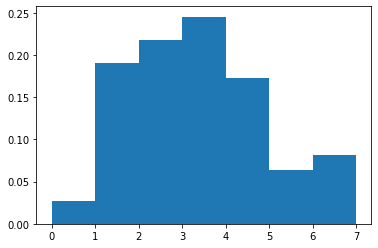

In [10]:
s = np.random.poisson(3, 110)
count, bins, ignored = plt.hist(s,7, normed=True)

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [17]:
#from the script given in class, I understand that we use chi square to compare
# the distribution of two given lists. In this case, I don't know how to read this part of the exercise
# "the scores were presented by N (985,50)." I'm going to assume that that correspondes
# to the expected values. And that I need to compare the actual values with the expected ones
# as per the exercise about the trips to doctor.
# unfortunately, there's no more information about this method on the ironhack
# portal and the documentation avaiblable is hard to read for those without a 
# statistical background.

sat_scores = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]
other_scores = [985] * 15

stats.chisquare(sat_scores, f_exp=other_scores)


Power_divergenceResult(statistic=57.03756345177664, pvalue=3.8535900782182244e-07)

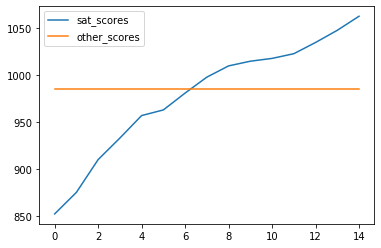

In [19]:
# visualising results
plt.plot(sat_scores, label = 'sat_scores')
plt.plot(other_scores, label = 'other_scores')
plt.legend()
plt.show()

In [ ]:
# Results are very different ?

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [31]:
# create dataframe

data = [[0, 32], [1, 15], [3, 9], [4,4]] 

ds = pd.DataFrame(data, columns = ["defective_items","freq"])
ds

,defective_items,freq
0,0,32
1,1,15
2,3,9
3,4,4


In [33]:
# as per here, I should use the kstest https://stats.stackexchange.com/questions/328803/python-test-if-my-data-follow-a-poisson-exponential-distribution

loc, scale = stats.norm.fit(ds['freq'])
n = stats.norm(loc=loc, scale=scale)
stats.kstest(ds['freq'], n.cdf)


KstestResult(statistic=0.25, pvalue=0.9639452436648751)

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [55]:
from scipy.stats import binom
from scipy.stats import chi2
n = 10
p = 0.05
# calculate expected values if they followed a binomial distribution
expected_values = binom.rvs(n, p, size=200)
# change to list
expected_values = expected_values.tolist()

# observed values - creating list
observed_values = ([0]*138) + ([1]*53) + ([2]*9)


# calculating chi sqaure

stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=nan, pvalue=nan)

In [ ]:
# why am I getting nan values? Is it the wrong type of chi square? 

## Question 5
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [63]:
#your answer here
from scipy.stats import chi2_contingency
obs = np.array([[32,12],[14,22],[6,9]])
chi2_contingency(obs)

(10.712198008709638,
 0.004719280137040844,
 2,
 array([[24.08421053, 19.91578947],
        [19.70526316, 16.29473684],
        [ 8.21052632,  6.78947368]]))

In [ ]:
# Is the second result the p value? (0.004)
# If so we can't reject the null hypothesis....?